# Python Group
## Wali Chaudhary, Bryce Shurts, & Alex Wright

## 1. Business Understanding

The Hotels Reservation dataset was uploaded by Ahsan Raza on kaggle in an effort to discover patterns in online-booking tendencies of hotel customers. Specifically, if a customer would honor the reservation or if they would eventually cancel it. The data was collected from a single country which cannot be disclosed for privacy reasons as stated by Ahsan in the Kaggle discussion posts.

The datasets description states there have been major issues in the hotel industry in regard to consumer online booking activity. The convenience and low to little cost of cancelling an online-booking has led to a significant change in consumer behavior. There are a larger number of cancellations and rescheduling due to changes of plans, scheduling conflicts, and other unforeseen circumstances. Ahsan describes this convenient cancellation feature as beneficial to hotel guests, but less desirable and possible revenue diminishing for hotels.

One can use this dataset to predict if a consumer will honor their reservation or not. Parties that may be interested in the classification result may be those employed in Hotel Management, or management from any industry that deals with an online reservation system such as restaurants, resorts, or motels. A hotel manager will be able to gain insight as to why certain customers may be more prone to online cancelling and may make better estimations regarding hotel occupancy.

### 1.1 Measure of Success

So, what defines a successful machine learning algorithm?
Due to the non-critical nature of hotel cancellations, it is safe to assume that a good model should be able to predict more accurately than random occurrence (50/50). For a business with a more aggressive strategy to produce profit, baseline of 80% for the classification rate may be ideal.


## 2. Data Understanding

The dataset contains 19 features, 14 numerical (continuous/discrete) and 5 categorical (nominal/ordinal), which can be broken down as such:

- Booking_ID: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
- no_of_adults: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_children: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_weekend_nights: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_week_nights: Quantitative, continuous, & ratio feature; integer repersentation
- type_of_meal_plan: Qualitative, discrete, & ordinal feature; integer repersentation
- required_car_parking_space: Qualitative, discrete, & nominal feature; binary repersentation
- room_type_reserved: Qualitative, discrete, & ordinal feature; integer repersentation
- lead_time: Quantitative, continuous, & ratio feature; integer repersentation
- arrival_year: Qualitative, discrete, & ordinal feature; integer repersentation
- arrival_month: Qualitative, discrete, & ordinal feature; integer repersentation
- arrival_date: Qualitative, discrete, & ordinal feature; integer repersentation
**Could be argued as nominal depending on how we apply it**
- market_segment_type: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
**Maybe it could be argued as ordinal? Not sure if there's really a clear hierarchy in the data**
- repeated_guest: Qualitative, discrete, & nominal feature; binary repersentation
- no_of_previous_cancellations: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_previous_bookings_not_canceled: Quantitative, continuous, & ratio feature; integer repersentation
- avg_price_per_room: Quantitative, continuous, & ratio feature; float repersentation
- no_of_special_requests: Quantitative, continuous, & ratio feature; integer repersentation
- booking_status: Qualitative, discrete, & nominal feature; binary repersentation

<sub> Plain english feature definitions can be sourced from the original's dataset listing at https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset in the Details section </sub>

In [352]:
import pandas as pd
import numpy as np
import seaborn

# Typings
from pandas import ( DataFrame, Series )
from numpy import ndarray

df: DataFrame = pd.read_csv("Hotel Reservations.csv")

### 2.1 Data Description

In [353]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [354]:
# Define data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Get some statistics about the data set

In [355]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,...,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,...,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,...,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,...,1.000000,13.000000,58.000000,540.000000,5.000000


### 2.2 Data Quality

After analyzing the data in the following graphs, we find that there is no missing data and that nothing will need to be imputed into our dataset.

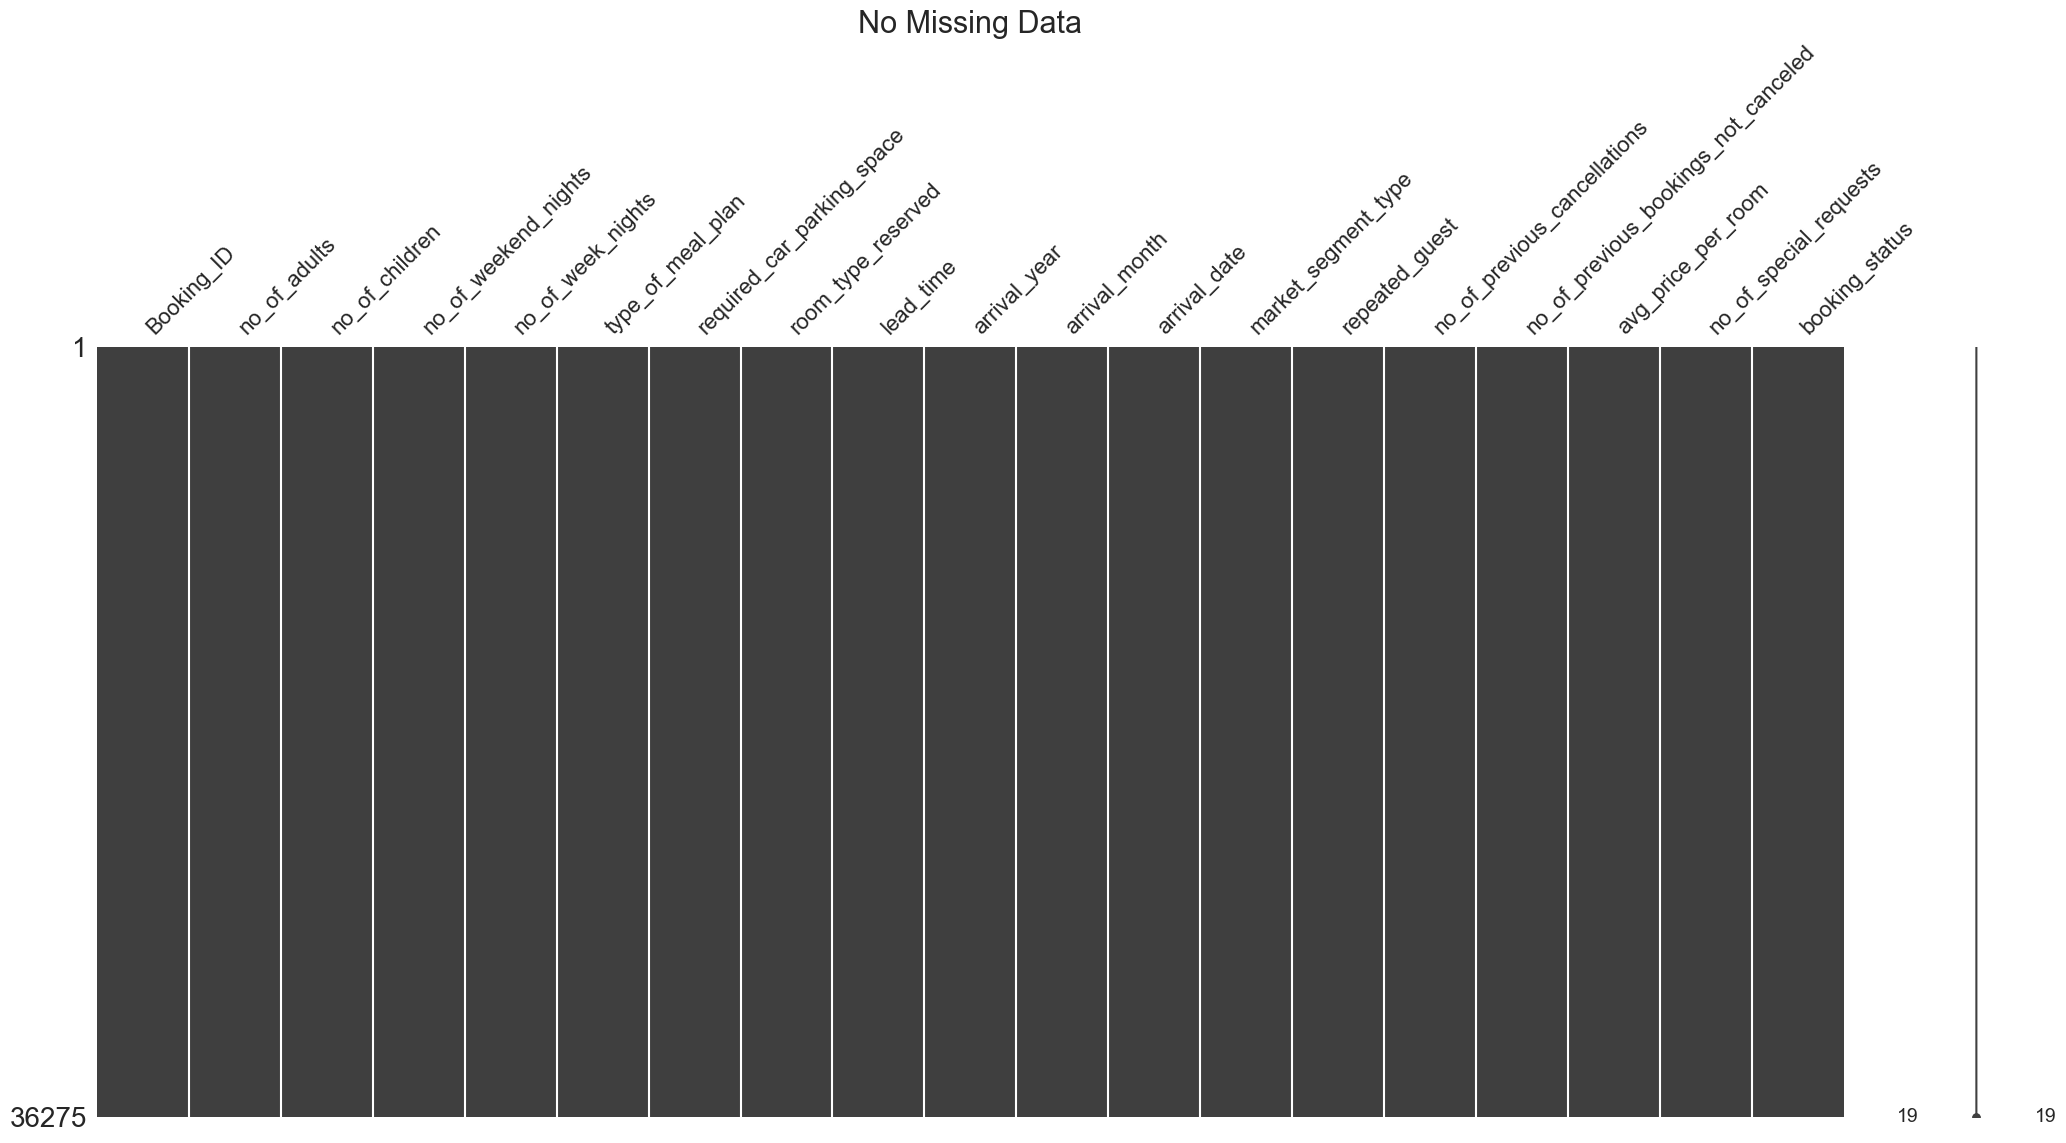

In [356]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import missingno as mn

df = pd.read_csv("Hotel Reservations.csv")
mn.matrix(df)
plt.title("No Missing Data", fontsize=22)
plt.show()


In [357]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Verify Data Quality

#### Duplicate entries
The dataset labels each entry with a unique ID that is associated with a booking entry by INNHotels, the hotel chain the data was sourced from. As such, we can be confident that the dataset does not contain any duplicate entries, vis-à-vis multiple entries repersenting the same booking.

#### Other invalid data
While duplicates may not be a chief concern, there is still the need to consider whether or not the data present in the dataset is entirely valid. For this purpose, we can do some basic sanity checking of the data:

In [358]:
# List all arrival years; any before 1986 or after 2022 would be invalid:
print(df["arrival_year"].lt(1986).any())
print(df["arrival_year"].gt(2022).any())

# Check for any dates that are invalid for the month:
# In place to avoid needing to make too many new dataframes
df.rename(columns= {"arrival_year": "year", "arrival_month": "month", "arrival_date": "day"}, inplace=True)

# TODO: avoid making temporary list
temp = pd.to_datetime(df[["year", "month", "day"]], errors = "coerce")
print(temp.isnull().any()) # True means there are invalid dates somewhere
df.drop(axis=1, index=temp[temp.isnull()].index, inplace=True)

False
False
True


#### Formatting data for machine learning

Because the Booking_ID column is different for every single row, it is likely to not have statistical significance as there are no relationships to it besides only from the row it's associated with. We can go ahead and drop it.

In [359]:
df.drop('Booking_ID', axis=1, inplace=True)

In [360]:
# Encode class labels

# Find the unique class label values (should be 'Canceled' and
# 'Not Canceled'), and transform the dataframe to include those
bk_status_mapping = {
    label: idx for idx, label in enumerate(np.unique(df.booking_status))
}
df.booking_status: Series = df.booking_status.map(bk_status_mapping)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,year,month,day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


Now lets one-hot encode any ordinal categorical features such as
type_of_meal_plan, room_type_reserved, arrival_year, market_segment_type.

During the one-hot encoding, we will also drop the first column of each produced set of columns after the one-hot encoding; this is to prevent a degree of multi-collinearity as the dropped column's value can be inferred from the absence any selected values in the other columns

In [361]:
df = pd.concat([df, pd.get_dummies(df[['type_of_meal_plan', 'room_type_reserved', 'year', 'market_segment_type']], drop_first=True)], axis=1)

df.drop(['type_of_meal_plan', 'room_type_reserved', 'year', 'market_segment_type'], axis=1, inplace=True)

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,...,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,...,0,0,0,1,0
1,2,0,2,3,0,...,0,0,0,0,1
2,1,0,2,1,0,...,0,0,0,0,1
3,2,0,0,2,0,...,0,0,0,0,1
4,2,0,1,1,0,...,0,0,0,0,1


In [362]:
print(df.dtypes)
print('========')
print(df.info())

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
month                                     int64
day                                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 2            uint8
room_type_reserved_Room_Type 3            uint8
room_type_reserved_Room_Type 4            uint8
room_type_reserved_Room_Type 5          

## 3. Data visualization

Now, let's continue on to visualize our data. The goal is to understand the following:

1) Which features are most important?
2) Which features are least important?
3) Is there a degree of relation between of each of the features? If so, what is the magnitude of that relation?

### Finding the most relevant features via Random Forest

Let's start off with finding out our most important features. One way to do that before moving to a PCA analysis is to apply the Random Forest algorithm, and training a model to find out the most relevant features.

We do not need to apply any feature scaling here because the Random Forest is based on many Decision Trees, and Decision Tree model doesn't marry the distances between two features. Rather, the split points of each tree are determined based on the decrease in impurity (a measurement of disorder, or randomness in the data) as the goal of a Decision Tree is to split the data into homogenous subsets end up with nodes that have more homogenous class distributions.

 1) lead_time                      0.328949
 2) avg_price_per_room             0.167492
 3) no_of_special_requests         0.103953
 4) day                            0.095300
 5) month                          0.080806
 6) no_of_week_nights              0.054155
 7) no_of_weekend_nights           0.038825
 8) market_segment_type_Online     0.030839
 9) no_of_adults                   0.023896
10) market_segment_type_Offline    0.014909
11) type_of_meal_plan_Meal Plan 2  0.010382
12) type_of_meal_plan_Not Selected 0.010342
13) room_type_reserved_Room_Type 4 0.009669
14) no_of_children                 0.007373
15) required_car_parking_space     0.006897
16) market_segment_type_Corporate  0.005495
17) room_type_reserved_Room_Type 2 0.002680
18) repeated_guest                 0.001940
19) room_type_reserved_Room_Type 6 0.001872
20) room_type_reserved_Room_Type 5 0.001568
21) no_of_previous_bookings_not_canceled 0.001412
22) market_segment_type_Complementary 0.000435
23) no_of_previous_canc

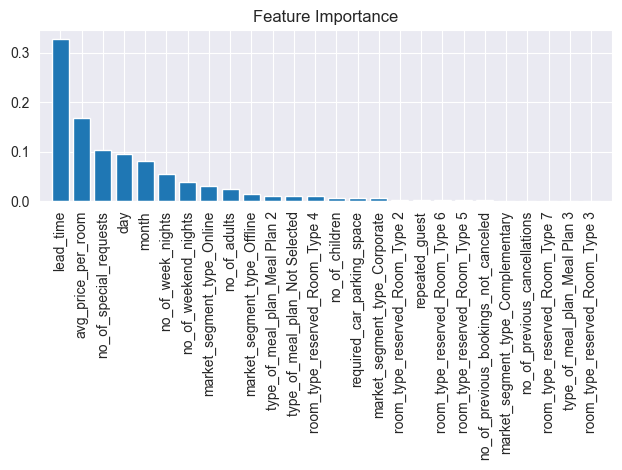

In [363]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop("booking_status", axis=1)
y = df["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
feature_labels: DataFrame = X_train.columns[0:]
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
importance_info = pd.Series(forest.feature_importances_, index=X.columns)
indices = np.argsort(importance_info)[::-1]

val = X_train.shape[1]
# Looping over # of features
for f in range(val):
    feat_idx = indices[f]
    feature_label = feature_labels[feat_idx]
    i_info = importance_info[feat_idx]
    print("%2d) %-*s %f" % (f + 1, 30, feature_label, i_info))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance_info[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

We can see that on the y-axis we have the relative feature importance, and on the x-axis we have each predictor variable.

The 3 most contributing features to the target variable, "booking_status", are the lead time, average price per room, and the number of special requests.

The 3 least contributing features would be the types of meal plan, room type reserved, and the number of previous cancellations.

To make further sense of this, let's now analyze the following questions based on the relevant features we found:

   1) What is the average duration of lead times that lead to the most cancellations?
   2) Is there a relationship between lead time and the average price per room for cancelled bookings?
   3) Can we identify a pattern in the combination of lead time, average price per room, and number of special requests for cancelled bookings?

#### 1) What is the average duration of lead times that leads to the most cancellations?

This is an important question because the observer may be interested in knowing how likely a customer that reserves closer or further to the start date will cancel. Ofcourse, this relationship is not the tell-all be-all, as we are only measuring the relationship between 2 features. However, it provides a solid foundation for us to begin branching out and understanding relationships between other highly relevant features to the booking status.

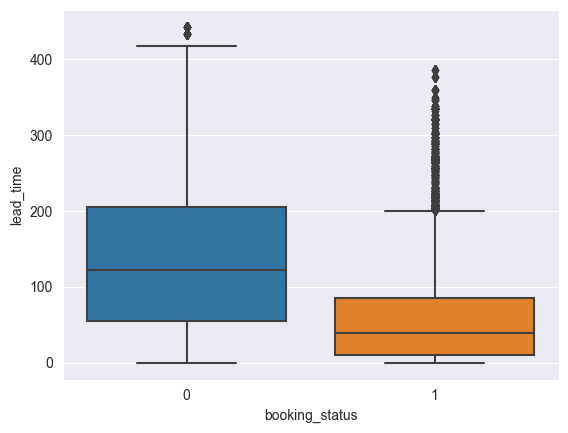



The average lead time for cancelled bookings is 139.27 days
The average lead time for fulfilled bookings is 58.95 days




In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the data to only include rows where booking_status is "Cancelled"
cancelled_bookings = df[df["booking_status"] == 0]
fulfilled_bookings = df[df["booking_status"] == 1]

# Calculate the average lead time for cancelled bookings
cancelled_avg_lead_time = round(cancelled_bookings["lead_time"].mean(), 2)
fulfilled_avg_lead_time = round(fulfilled_bookings["lead_time"].mean(), 2)

sns.boxplot(x=y, y=X["lead_time"])
plt.show()

print("\n")
print(f"The average lead time for cancelled bookings is {cancelled_avg_lead_time} days")
print(f"The average lead time for fulfilled bookings is {fulfilled_avg_lead_time} days")
print("\n")


Great, so from the boxplot and the average measurement of the lead times for both cancelled and fulfilled bookings, we can tell cancelled bookings generally have a higher lead time than fulfilled bookings, by a rather significant margin. The average lead time is 2.36x higher for cancelled reservations (139.27 days) than their fulfilled counterparts (58.95 days). 

Now that we have established a general relationship, let's fine tune a bit further by examining the Interquartile ranges. This will help us get a more granular view of the data and provide more focused view of its central tendency while refraining from tracking outliers.

In [365]:
iqr_cancelled = cancelled_bookings['lead_time'].quantile(0.75) - cancelled_bookings['lead_time'].quantile(0.25)
iqr_fulfilled = fulfilled_bookings['lead_time'].quantile(0.75) - fulfilled_bookings['lead_time'].quantile(0.25)

print("\n")
print(f"IQR for cancelled bookings lead time: {iqr_cancelled}")
print(f"IQR for fulfilled bookings lead time: {iqr_fulfilled}")
print("\n")



IQR for cancelled bookings lead time: 150.0
IQR for fulfilled bookings lead time: 76.0




From the IQR ranges, we can tell that the central part of the data still maintains a strong correlation with the data we gathered from calculating the average lead times for booking status. The IQR for the lead time of cancelled bookings is 1.97x the IQR of those for fulfilled bookings. 

The average takes into account outliers as it provides a view of the entire dataset, rather than the focused view of the IQR on the central 50% of the data. 

Because of how similar the values calculated by both statistics are, we can conclude that there are little outliers in the analyzed data because the general relationship of cancelled bookings lead times being roughly ~2x those of fulfilled bookings is maintained by both the Average and IQR statistics.

#### 2) Is there a relationship between lead time and the average price per room for cancelled bookings?

The reason we may want to explore this is to see if there is a relationship between the pricing of a cancelled booking and how long a customer may have waited before the initial reservation. 

Generally, one would assume reservations made closer to the start of the reservation will be priced higher across the hotel industry due to supply and demand. The demand would be higher closer to the reservation time, and the supply would be lower as there would generally be less rooms available at the current time and booking further in advance.

There are 2 purposes for us analyzing the relationship between the lead time and average price per room for cancelled reservations. First, it will allow us to verify the general assumption that those who book closer to the start date will generally have higher priced rooms. Second, this will inform the observer as to how willing a customer would be to cancel a reservation if it's closer or further to the reservation start time, and with the given price associated with that lead time. This is important information because the observer can act on any findings to reduce price for those likely to cancel given a certain lead time, or other measures to protect business.

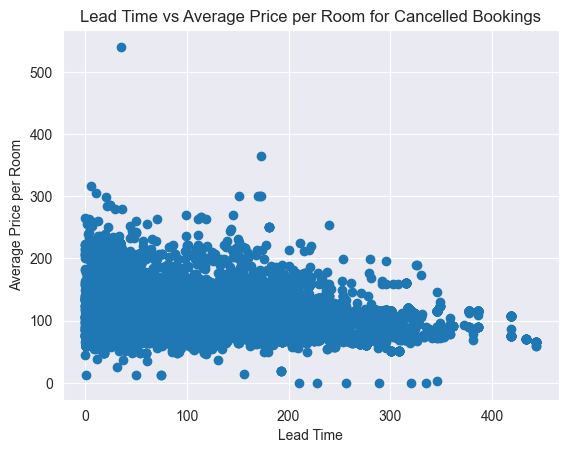

In [366]:
# Subset the data to only include rows where booking_status is "Cancelled", or 0
cancelled_bookings = df[df["booking_status"] == 0]

# Plot the relationship between lead_time and avg_price_per_room for cancelled bookings
plt.scatter(cancelled_bookings["lead_time"], cancelled_bookings["avg_price_per_room"])
plt.xlabel("Lead Time")
plt.ylabel("Average Price per Room")
plt.title("Lead Time vs Average Price per Room for Cancelled Bookings")
plt.show()

From the scatter plot, we can see a slight negative correlation between the average price per room, and the lead time. However, it's hard to infer other important characteristics; such as if the negative correlation is statistically significant, or if the average price per room is a good predictor for lead time. 

A Least Squares Regression may be helpful here, as it is a good statistical measure for how significant the relationship between 2 independent variables are. An Ordinary Least Squares Regression is type of Least Squares Regression that will additionally will estimate the paramters that will best fit the data for us. Let's run a Ordindary Least Squares Regression to collect some more data.

In [367]:
import statsmodels.api as sm

## Subset the data to only include rows where booking_status is "Cancelled" (0)
# cancelled_bookings = df[df["booking_status"] == 0]

X = cancelled_bookings["lead_time"].values
X = sm.add_constant(X)
y = cancelled_bookings["avg_price_per_room"].values
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     523.7
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          1.81e-113
Time:                        16:10:46   Log-Likelihood:                -57861.
No. Observations:               11878   AIC:                         1.157e+05
Df Residuals:                   11876   BIC:                         1.157e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.9401      0.500    239.775      0.0

We can use a couple measurements given by the Ordinary Least Squares regression output to better our understanding. 

In this scenario the dependent variable is the average price per room, and the independent variable is the lead time. The model tells us that the lead time has a significant negative correlation with the average price per room. This is explained by the p-value being less than .005, with a coefficient of -0.067. This means that the longer the lead time, the lower the average price per room will be.

The R-squared value (.042), tells us that the lead time explains only 4.2% of the variance in the average price per room. This means that the lead time is not a strong predictor of the average price per room.

Interestingly, the F-statistic is quite large so there definitely does exist a strong statistical relationship and the lead time does have a measurable impact on the average price per room.

However, the low R-Squared value tells us that even though there does exist a strong measurable impact via the high F-statistic, there is only a small proportion of the variation in the average price per room that can be explained by the lead time, and the majority of the variation (95.8%) is told by other factors. 

Therefore, it can be said that even though the lead time is statistically significant, it is not a good predictor of the average price per room.

#### 3) Can we identify a pattern in the combination of lead time, average price per room, and number of special requests for cancelled bookings?

This is an interesting question as we are taking multivariate data into account, and this question is exploratory in nature. This questions builds upon the previous ones as we are now adding a variable for special requests, and we are trying to find relationships between the 4 of those features rather than specifically targeting a certain relationship.

From the last question, we found that cancelled bookings with less lead time tended to pay higher prices per room. With this question, we will now understand how cancelled reservations with certain lead times & prices per room may be influenced by the number of special requests.

This is important to answer because we will then potentially be able to further subdivide the customers willing to cancel versus those who do not. From a hotel managers perspective, it may be of interest because they will better understand how the frequency of special requests can build upon our previous findings about the relationship between lead time and prices per room. 

"Do customers who cancelled with less lead time and higher room prices tend to order more special requests?"

These kinds of questions will be better understood with our findings. Let's first start off with some visualization.


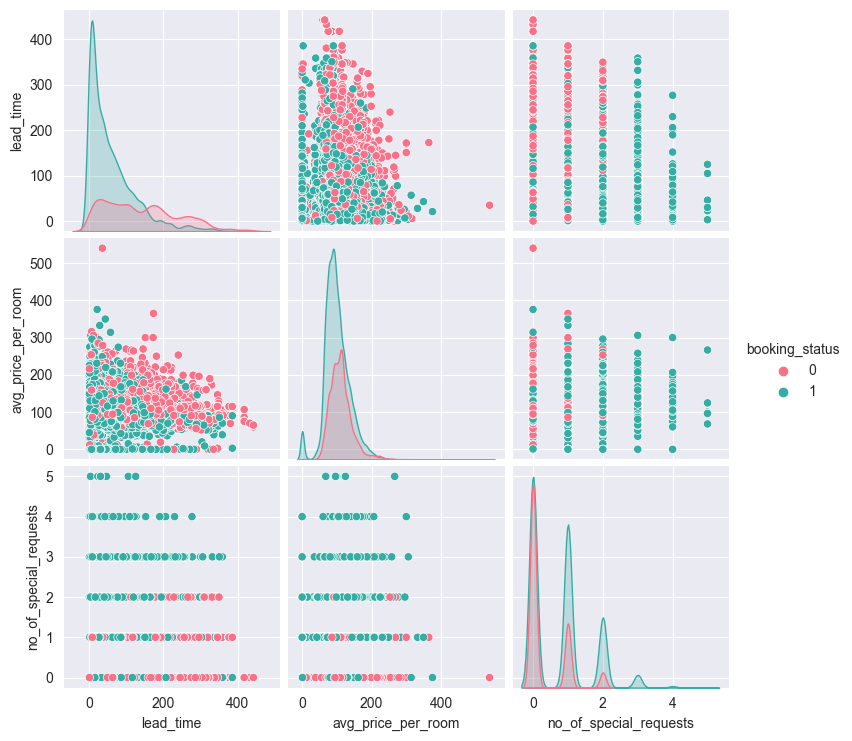

In [374]:
# subset = cancelled_bookings[['lead_time', 'avg_price_per_room', 'no_of_special_requests']]
subset = df[['booking_status','lead_time', 'avg_price_per_room', 'no_of_special_requests']]
subset.describe()
subset.corr()
sns.pairplot(subset, hue="booking_status", palette="husl")

From the pairwise plot, we can get a good exploratory view of the relationships between lead_time, no_of_special_requests, avg_price_per_room and booking_status with booking_status being differentiated with 0 (Cancelled) bookings being red, and 1 (Not Cancelled or Fulfilled) bookings being green.

Let's start by examining the relationship between the booking status and number of special requests by looking at the kernel density graph on the bottom right. We can see the there are high preaks at and for 0 & 1 special requests for cancelled reservations, with the highest being at 0 and the peak at 1 being significant but still less than the peak for fulfilled. From 1-4 special requests, we can see the fulfilled reservations have significantly higher peaks than those who cancelled. From this kernel density graph, we can tell there's a much higher frequency of special requests from those fulfilled bookings than those cancelled.

If we look at the bottom left or top right scatterplot for no_of_special_requests and lead_time with a colored booking_status, we can see that bookings with less lead time tended to have more special requests, and those bookings also tended to be fulfilled rather than cancelled ones. This makes sense as that builds upon our previous observation that fulfilled bookings tend to have more special requests. 
This is also interesting as it builds on our findings in question 1 that smaller lead times tend to have fulfill their bookings.

The scatterplot for special requests and the average price per room doesn't seem to have strong visual significance. 

In summary, we can see that special request frequencies tend to be higher in fulfilled bookings, and that lower special request frequencies tend to have higher lead times and higher booking cancellations.


#### Correlation between different columns

In [ ]:
import seaborn as sns
# Use Pearson correlation since data is discrete (req. for Pearson)
discrete_corr = df[["type_of_meal_plan_Meal Plan 2", "type_of_meal_plan_Meal Plan 3", "type_of_meal_plan_Not Selected", "required_car_parking_space", "repeated_guest", "month", "day","market_segment_type_Online", "market_segment_type_Offline", "market_segment_type_Corporate", "market_segment_type_Complementary"]]
discrete_corr = discrete_corr.corrwith(df["booking_status"], method="pearson", numeric_only=True)
plt.figure(figsize=(4,7))
sns.heatmap(discrete_corr.to_frame("Correlation with booking status"), annot=True, cmap='PiYG')

In [ ]:
import seaborn as sns
# Use Kendall's correlation since some data is ordinal & not continuous (req. for Pearson)
continuous_corr = df[["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests"]]
continuous_corr = continuous_corr.corrwith(df["booking_status"], method="kendall", numeric_only=True)
plt.figure(figsize=(4,7))
sns.heatmap(continuous_corr.to_frame("Correlation with booking status"), annot=True, cmap='PiYG')

#### Principal Component Analysis

Before actually launching into the PCA work, we first want to examine the dataset as a whole. By doing so, we hope to gain insight into the distribution of data across our features, which may inform our later normalization. If the data is siginifcantly skewed, for instance, we may want to perform log scaling or sample clipping on certain features prior to computing a z-score normalization.

In [ ]:
_ = df.hist(figsize=(25,25))

TODO (Bryce): Add some analysis once our other methods for dimension reduction are implemented

In [ ]:
from scipy.stats import zscore
# Remove booking_status since it's going to heavily correlate to the target feature (itself...)
df_temp = df.drop("booking_status", axis=1)
#TODO (Bryce): Potentially add some extra scaling/normalization features.
df_normalized = df_temp.apply(zscore)

Now that we have our data normalized, we need to identify the number of components we should be reducing our data to, so that we have as few dimensions as possible to handle while still being able to explain as much of our data's variance as possible. To do this, we will generate several normal PCAs and compare the resulting eigenvalues against the Kaiser rule to determine the ideal set of components for later analysis and clustering.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=df_normalized.shape[1])
pca.fit(df_normalized)

color_var = "#008000"
color_eig = "#0000FF"
fig, ax_var = plt.subplots(figsize=(9,6))
ax_eig = ax_var.twinx()
ax_var.set_xlabel("Component")
ax_var.set_title("Component Analysis")
ax_var.set_ylim(0, 20)
ax_eig.set_ylim(0, 4)

ax_var.plot(pca.explained_variance_ratio_ * 100, marker="x", color=color_var)
ax_var.set_ylabel('Percentage of Explained Variance', color=color_var)
ax_var.tick_params(axis="y", labelcolor=color_var)

ax_eig.plot(pca.explained_variance_, marker="o", color=color_eig)
ax_eig.set_ylabel("Eigenvalue (λ) size", color=color_eig)
ax_eig.tick_params(axis="y", labelcolor=color_eig)
ax_eig.axhline(y=1, linestyle=":", label="Kaiser rule", color=color_eig)

intersection = np.argwhere(np.diff(np.sign(1 - pca.explained_variance_))).flatten()
if len(intersection) == 0:
    num_components = len(final_pca.explained_variance_)
else:
    num_components = intersection[0] - 1
    ax_eig.axvline(x=num_components, linestyle="dashed", label="Component %d" %(num_components + 1), color="red")
sum = 0
for index in range(num_components):
    sum = sum + (pca.explained_variance_ratio_[index] * 100).round(1)
    ax_var.text(index, pca.explained_variance_ratio_[index] * 100, (pca.explained_variance_ratio_[index] * 100).round(1), size=12)
    ax_eig.text(index, pca.explained_variance_[index], pca.explained_variance_[index].round(1), size=12)
    
ax_eig.legend(loc="upper right")
plt.show()
print("Amount of variance explained by all components s.t. λ_component > 1: " + str(sum) + "%")

Now that we can see our ideal number of components, we need to re-apply the PCA using N components and the X method (Linear, Kernel (polynominal, RBF, sigmoid, etc.), Sparse, Incremental, etc.) using a more thorough single-value decomposition method (lapack instead of randomized)

Author's note: probably going to be a linear unless we end up finding that more complex transformations would be useful

In [ ]:
final_pca = PCA(n_components=num_components, svd_solver="full")
final_pca.fit(df_normalized)

color_var = "#008000"
color_eig = "#0000FF"
fig, ax_var = plt.subplots(figsize=(9,6))
ax_eig = ax_var.twinx()
ax_var.set_xlabel("Component")
ax_var.set_title("Final Component Analysis")
ax_var.set_ylim(0, 20)
ax_eig.set_ylim(0, 4)

ax_var.plot(final_pca.explained_variance_ratio_ * 100, marker="x", color=color_var)
ax_var.set_ylabel('Percentage of Explained Variance', color=color_var)
ax_var.tick_params(axis="y", labelcolor=color_var)

ax_eig.plot(final_pca.explained_variance_, marker="o", color=color_eig)
ax_eig.set_ylabel("Eigenvalue (λ) size", color=color_eig)
ax_eig.tick_params(axis="y", labelcolor=color_eig)
ax_eig.axhline(y=1, linestyle=":", label="Kaiser rule", color=color_eig)

# All of the Kaiser rule and intersection stuff is just a sanity check at this point
intersection = np.argwhere(np.diff(np.sign(1 - final_pca.explained_variance_))).flatten()
if len(intersection) == 0:
    num_components = len(final_pca.explained_variance_)
else:
    num_components = intersection[0] - 1
    ax_eig.axvline(x=num_components, linestyle="dashed", label="Component %d" %(num_components + 1), color="red")
sum = 0
for index in range(num_components):
    sum = sum + (final_pca.explained_variance_ratio_[index] * 100).round(1)
    ax_var.text(index, final_pca.explained_variance_ratio_[index] * 100, (final_pca.explained_variance_ratio_[index] * 100).round(1), size=12)
    ax_eig.text(index, final_pca.explained_variance_[index], final_pca.explained_variance_[index].round(1), size=12)
    
ax_eig.legend(loc="upper right")
plt.show()
print("Amount of variance explained by all components: " + str(sum) + "%")

#### Clustering (TODO)

Probably going to use WCSS & the elbow method, but implementing DBSCAN might be worth examining as well (they both automatically determine the number of clusters/groups/communities in a dataset)

In [ ]:
df = pd.read_csv("Hotel Reservations.csv")
df['market_segment_type'].value_counts()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=df, x='market_segment_type', hue='booking_status', palette='rainbow')
plt.title('market segment type vs booking status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+500))

In [ ]:
plt.figure(figsize=(10,8))
x=sns.kdeplot(data=df,y='avg_price_per_room',hue='booking_status',fill=True,gridsize=1000)
x.set_yticks(range(0,600,50))
plt.show()

### 3.1 Data Exploration

We see that Online reservations have a high cancellation rate, while corporate and complementary reservations see low cancellation rates

In [ ]:
# on the basis of arrival_month 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=df,x='arrival_month',hue='booking_status',palette='viridis')
plt.title('arrival_month vs booking status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))

In [ ]:
plt.hist2d(x=df.lead_time, y=df.avg_price_per_room, bins=30)
plt.colorbar()
plt.xlabel("Lead Time")
plt.ylabel("Room Price")
plt.show()

In [ ]:
import numpy as np

# plot the correlation matrix 
vars_to_use = ['lead_time', 'avg_price_per_room', 'no_of_week_nights', 'no_of_weekend_nights'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

In [ ]:
# TODO: hue argument as no_of_week_nights doesn't work here, need to modify this
sns.violinplot(x="lead_time", y="avg_price_per_room", hue="no_of_week_nights", data=df, 
               split=True, # split across violins
               inner="quart", # show innner stats like mena, IQR, 
               scale="count") # scale the size of the plot by the count within each group

plt.show()

Some graphs from:
https://www.kaggle.com/code/effortno11/beginner-friendly-eda-model-comparison#Data-Analysis

# Uniform Manifold Approximation

In [ ]:
import umap
import umap.plot
import pandas as pd
from sklearn.utils import Bunch
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=class_color)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=class_color)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2],  c=class_color, s=100)
    plt.title(title, fontsize=18)

df = pd.read_csv("Hotel Reservations.csv")
df.head()

# drop booking id
df.drop('Booking_ID', axis=1, inplace=True)

# define maps for string variables
map1 = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2}
map2 = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6 }
map3 = {'Offline':0, 'Online':1, 'Corporate':2, 'Aviation':3, 'Complementary':4}
map4 = {'Not_Canceled':0, 'Canceled':1}

# convert strings to integers
df.type_of_meal_plan = df.type_of_meal_plan.map(map1)
df.room_type_reserved = df.room_type_reserved.map(map2)
df.market_segment_type = df.market_segment_type.map(map3)
df.booking_status = df.booking_status.map(map4)

# drop any NaN's (should be none, but just in case)
df = df.dropna()
df.head()

# get columns for scaling
df_data = df[
    [

        "required_car_parking_space", "room_type_reserved", "lead_time", 
         "market_segment_type","repeated_guest", "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled", "no_of_special_requests", "booking_status",
        
    ]
].values

# shift mean to center and scale by std deviation
scaled_df_data = StandardScaler().fit_transform(df_data)

# init UMAP
reducer = umap.UMAP(
n_neighbors=15, min_dist=0.1, n_components=3, metric='euclidean'
)

# fit data
embedding = reducer.fit_transform(scaled_df_data)

# draw scatter plot (not too useful as this data doesn't seperate as nicely as things like measured lenghts of objects)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.booking_status])
plt.gca().set_aspect('equal', 'datalim')
plt.title('2D UMAP projection of the Hotel dataset', fontsize=24);

# draw umap for various neighbor sizes
data = scaled_df_data
# assign each booking status a color used for 3d plot
class_color = [sns.color_palette()[x] for x in df.booking_status]

# draw umap in 3 dimensions
draw_umap(n_components=3, title='3D UMAP projection of the Hotel dataset')


# References
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html
# https://umap-learn.readthedocs.io/en/latest/parameters.html

# https://umap-learn.readthedocs.io/en/latest/plotting.html

# Also useful link
# https://scikit-learn.org/stable/tutorial/index.html


# UMAP Results
From the projections you can see clustering on the north side of the 3d projection as well as on the north side of the 2D projection showing clearing defined clustering of cancelled and honored reservations
